<a href="https://colab.research.google.com/github/manish0496/Deeplearning/blob/master/mnist_digit_recognizer1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MNIST Handwritten Digit Classification Dataset

#### The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset.

#### It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.

#### The task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively.

#### It is a widely used and deeply understood dataset and, for the most part, is “solved.

In [ ]:
!pip install tensorflow-gpu==2.0.0-rc0

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout
import tensorflow as tf


In [4]:
#import dataset
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


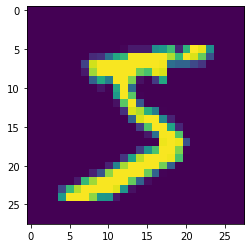

In [5]:
plt.imshow(x_train[0])

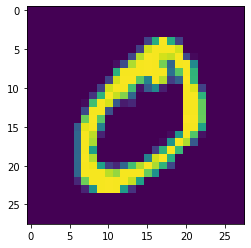

In [6]:
plt.imshow(x_train[1])

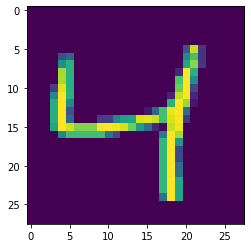

In [7]:
plt.imshow(x_train[2])

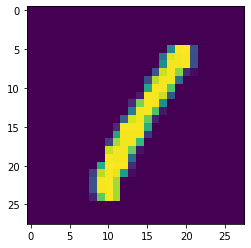

In [8]:
plt.imshow(x_train[3])

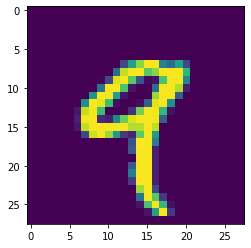

In [9]:
plt.imshow(x_train[4])

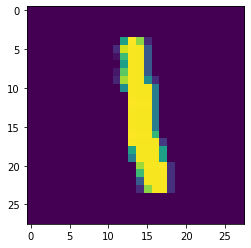

In [10]:
plt.imshow(x_train[6])

In [11]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [12]:
x_train.max()

255

In [14]:
x_train=x_train/255.0

In [15]:
x_test=x_test/255.0

In [16]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [17]:
x_train[0].shape

(28, 28, 1)

In [18]:
input_shape=x_train[0].shape

#Build model

In [22]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=input_shape))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(.50))
model.add(Dense(10,activation='softmax'))


In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [24]:
#compile
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
history=model.fit(x_train,y_train,batch_size=128,epochs=10,verbose=1,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 166us/sample - loss: 0.9547 - accuracy: 0.6866 - val_loss: 33.9599 - val_accuracy: 0.8940
Epoch 2/10
60000/60000 [==============================] - 4s 58us/sample - loss: 0.4185 - accuracy: 0.8721 - val_loss: 27.1117 - val_accuracy: 0.9242
Epoch 3/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3556 - accuracy: 0.8915 - val_loss: 22.1156 - val_accuracy: 0.9374
Epoch 4/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.3191 - accuracy: 0.9037 - val_loss: 19.6087 - val_accuracy: 0.9486
Epoch 5/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2842 - accuracy: 0.9141 - val_loss: 16.5362 - val_accuracy: 0.9501
Epoch 6/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.2549 - accuracy: 0.9226 - val_loss: 16.8405 - val_accuracy: 0.9495
Epoch 7/10
60000/60000 [========================

In [26]:
model.evaluate(x_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[31.63502134330367, 0.9321]

## Learning curve

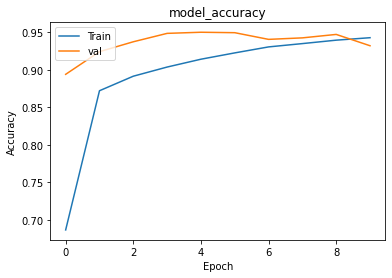

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','val'],loc='upper left')

## Confusion matrix

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc417220f28>)

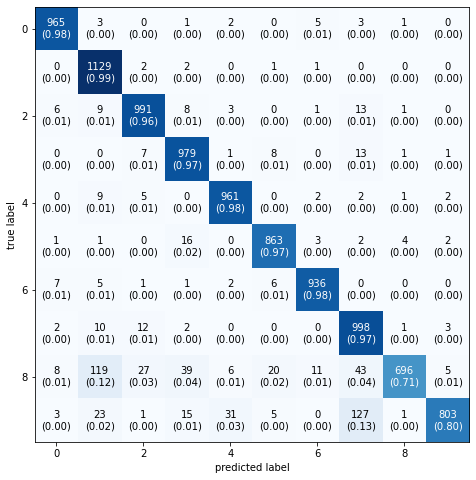

In [29]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
y_pred=model.predict_classes(x_test)
mat=confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=mat,show_normed=True,figsize=(8,8))